In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Titanic_Data+Analysis for group 10

In [2]:
titanic=pd.read_csv('titanic.csv')

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Survival (Gender wise)

In [7]:
# Who didn't survive

titanic[titanic['Survived']==0].groupby('Sex').count()['Survived']

Sex
female     81
male      468
Name: Survived, dtype: int64

In [8]:
# Who survived

titanic[titanic['Survived']==1].groupby('Sex').count()['Survived']

Sex
female    233
male      109
Name: Survived, dtype: int64

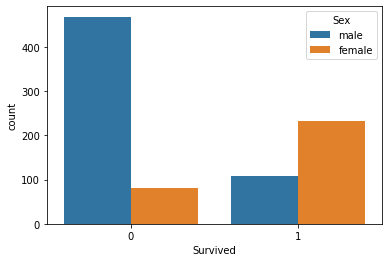

In [11]:
sns.countplot(titanic['Survived'],data=titanic,hue='Sex')

### #We can conclude that, rate of survival of female passengers are more than the rate of male passengers.

# Survival (PClass wise)

In [9]:
# Those who didn't survive

titanic[titanic['Survived']==0].groupby('Pclass').count()['Survived']

Pclass
1     80
2     97
3    372
Name: Survived, dtype: int64

In [10]:
# Those who survived

titanic[titanic['Survived']==1].groupby('Pclass').count()['Survived']

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

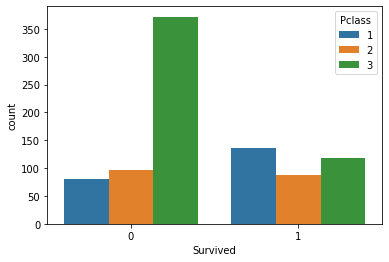

In [12]:
sns.countplot(titanic['Survived'],data=titanic,hue='Pclass')

### #We can conclude that, rate of survive for Pclass 3 passengers are very low compared to other Pclasses. Rate of survival for Pclass 1 is better than other Pclasses.

# Survival (Embarked wise)

In [13]:
print("Number of people who couldn't survive of",titanic[titanic['Survived']==0].groupby('Embarked').count()['Survived'])
print("Number of people who survived of",titanic[titanic['Survived']==1].groupby('Embarked').count()['Survived'])

Number of people who couldn't survive of Embarked
C     75
Q     47
S    427
Name: Survived, dtype: int64
Number of people who survived of Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64


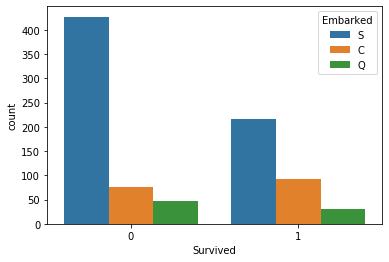

In [13]:
sns.countplot(titanic['Survived'],data=titanic,hue='Embarked')

### #We can say that, total number of Embarked S passenger is much more than other embarked( C,Q) . As the number of survival and death both are larger for Embarked S.

# Fare (Pclass wise)

In [18]:
med=titanic.groupby('Pclass')['Fare'].median()
med

Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64

In [19]:
M=titanic.groupby('Pclass')['Fare'].mean()
M

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

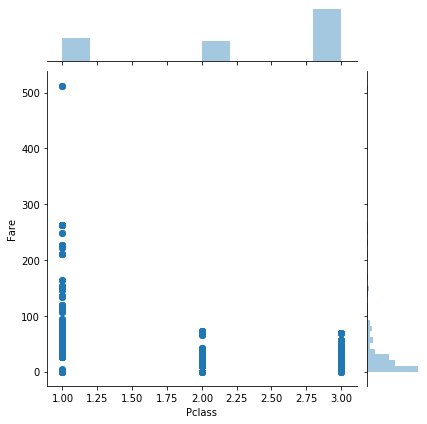

In [33]:
sns.jointplot(x='Pclass',y='Fare',data=titanic,kind='scatter')

### #For Pclass 1, the fare is high generally, for Pclass 2, it is medium fare. In case of Pclass3 , the fare much lower than other Pclasses.

# Approaches to plot the survival count of ranges of Ages

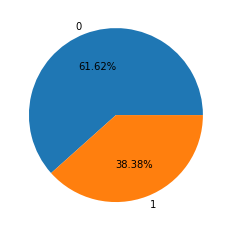

In [22]:
surv=titanic['Survived'].value_counts()
plt.pie(surv,labels=surv.index,autopct="%0.2f%%")
plt.show()

In [4]:
mask=titanic[titanic['Age']>1]
mask1=titanic[titanic['Age']<81]
mask1.shape

a = mask1[(mask1['Age'] > 1) & (mask1['Age'] < 10)]
b = mask1[(mask1['Age'] > 10) & (mask1['Age'] < 20)]
c = mask1[(mask1['Age'] > 20) & (mask1['Age'] < 30)]
d = mask1[(mask1['Age'] > 30) & (mask1['Age'] < 40)]
e = mask1[(mask1['Age'] > 40) & (mask1['Age'] < 50)]
f = mask1[(mask1['Age'] > 50) & (mask1['Age'] < 60)]
g = mask1[(mask1['Age'] > 60) & (mask1['Age'] < 81)]


In [6]:
a.shape

(48, 12)

In [7]:
c.shape

(205, 12)

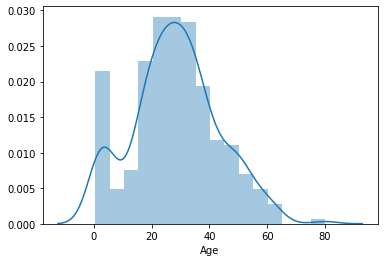

In [91]:
sns.distplot(mask1[mask1['Survived']==1]['Age'])

In [53]:
b

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S


In [73]:
mask=titanic[titanic['Age']>1]
mask1=titanic[titanic['Age']<81]
mask1.shape


(714, 13)

In [74]:
mask1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          185 non-null object
Embarked       712 non-null object
Family         714 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 78.1+ KB


### #The different age wise survival rate is shown in the distplot. As the total number of adults( eg. age group between 20-30) is very much more than number of children(1-10) , So it is obvious that the peak for age of adults is more than the peak of children age .We can conclude Probability of survival of childern will be more than any other age groups, as the total number of children and number of children survived are almost same.

# Keeping Parch and SibSp in new 'Family' column

In [54]:
titanic['Family']="None"

In [55]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,None
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,None
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,None
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,None
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,None
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,None
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,None


In [57]:
for Family in titanic:
    titanic['Family']=titanic['Parch']+titanic['SibSp']+1

In [62]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [60]:
titanic.drop(columns=['SibSp','Parch'])

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C148,C,1


### #We are able to keep both Parch and SibSp columns into 'Family' column and delete previous two columns.